C:\Users\Dell\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


<IPython.core.display.Javascript object>


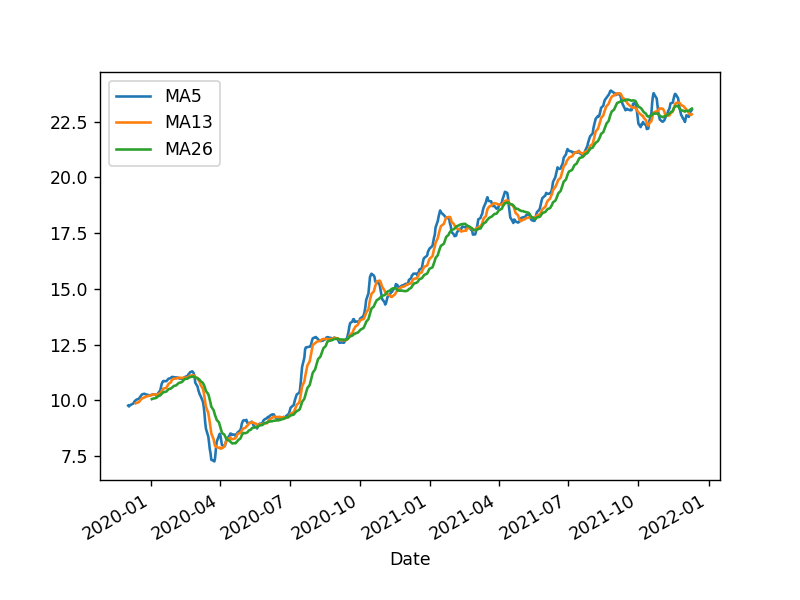

<IPython.core.display.Javascript object>


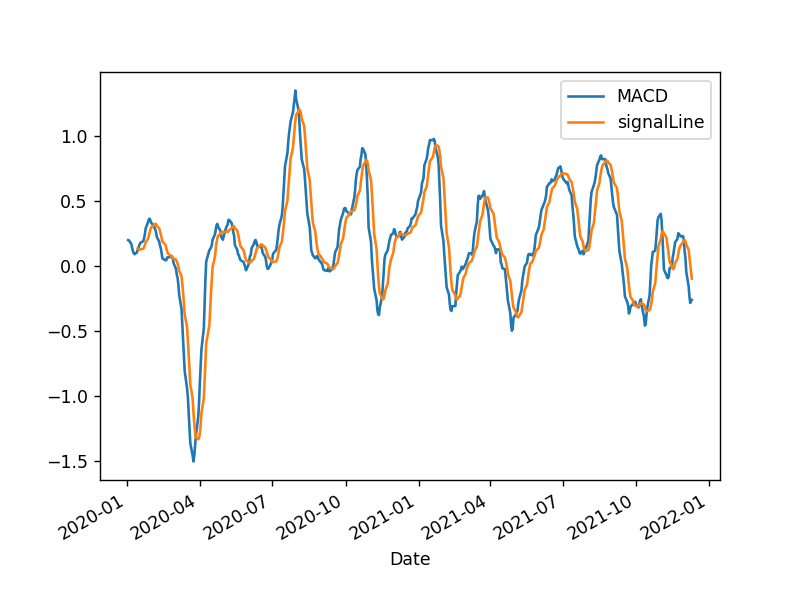

<IPython.core.display.Javascript object>


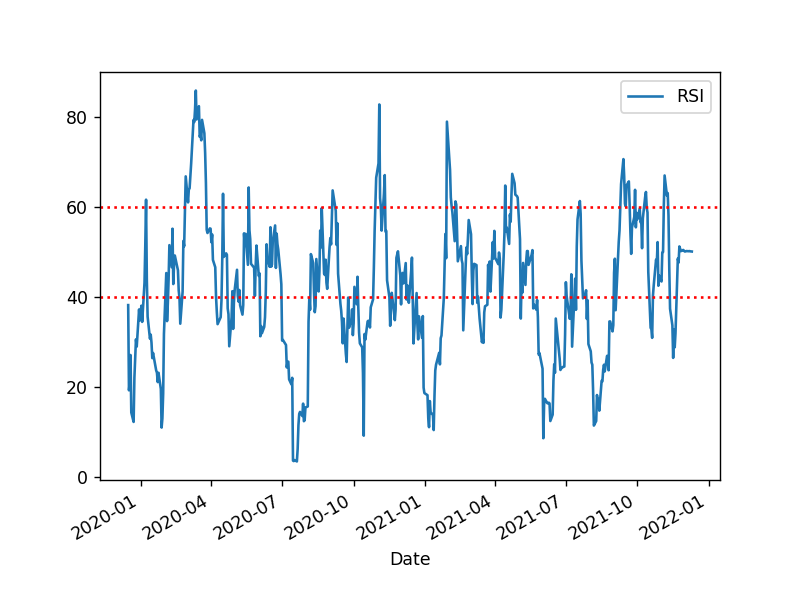

<IPython.core.display.Javascript object>


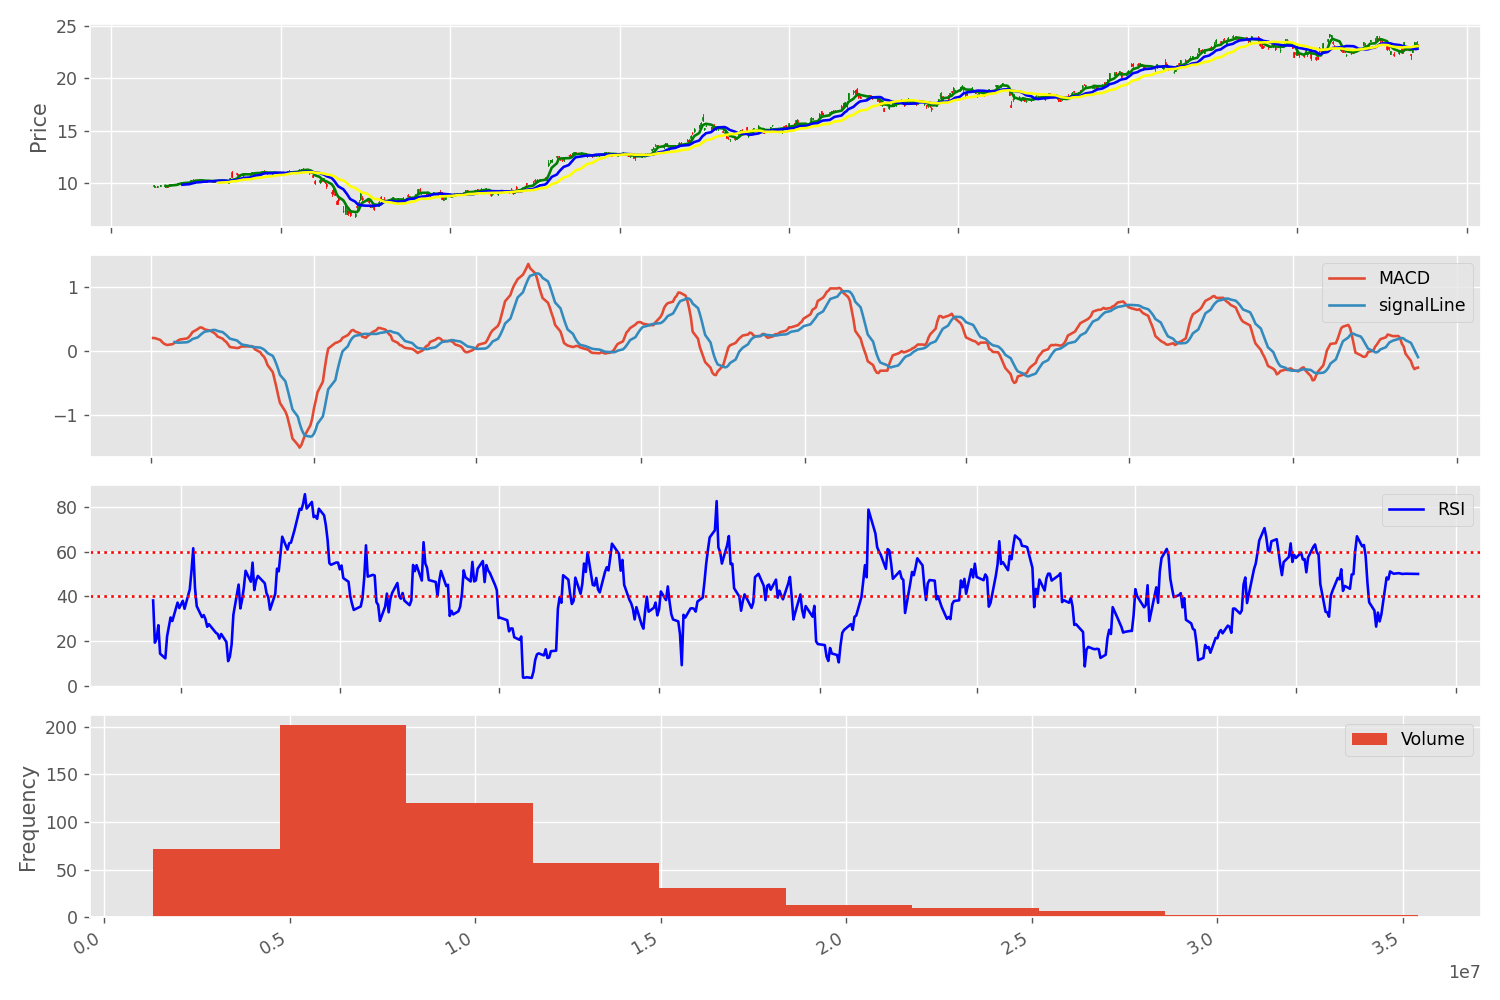

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib notebook
start=dt.datetime(2019,11,24)
data=pdr.get_data_yahoo("INFY",start)
data['MA5']=data['Close'].rolling(5).mean()
data['MA13']=data['Close'].rolling(13).mean()
data['MA26']=data['Close'].rolling(26).mean()
data['MA12']=data['Close'].rolling(12).mean()
data['MACD']=data['MA12']-data['MA26']
data['signalLine']=data['MACD'].rolling(9).mean()
data['Change']=data['Close']

for i in range(1,505):
    temp=data.iloc[(i-1):(i+1)]
    data['Change'][i]=temp['Close'][0]-temp['Close'][1]
data["Change"][0]=np.nan

data["Gain"]=data['Change']
data["Loss"]=data['Change']

for i in range(1,505):
    n=data['Change'][i]
    if(n<0):
        data['Gain'][i]=0
        data['Loss'][i]=-data['Loss'][i]
    elif(n>0):
        data['Loss'][i]=0
data['AvgGain']=data['Gain'].rolling(14).mean()

data['AvgLoss']=data['Loss'].rolling(14).mean()
data['RS']=data["AvgGain"]/data["AvgLoss"]
data['RSI']=100-(100/(1+data['RS']))
fig,ax=plt.subplots()
data[['MA5','MA13','MA26',]].plot(ax=ax)
fig,ax=plt.subplots()
data[['MACD','signalLine']].plot(ax=ax)
fig,ax=plt.subplots()
data[['RSI']].plot(ax=ax)
plt.axhline(y = 60, color = 'r', linestyle = ':')
plt.axhline(y = 40, color = 'r', linestyle = ':')
plt.style.use('ggplot')
data2=data
data2['Date']=data2.index
ohlc = data2.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, (ax,ax3,ax4,ax2) = plt.subplots(4,figsize=(12,8), )

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)


# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
data['Volume'].plot(ax=ax2,kind="hist")

data[['MACD','signalLine']].plot(ax=ax3)

data[['RSI']].plot(ax=ax4,color='blue')
ax4.axhline(y = 60, color = 'r', linestyle = ':')
ax4.axhline(y = 40, color = 'r', linestyle = ':')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
ax.plot(ohlc['Date'], data['MA5'], color='green', label='MA5')
ax.plot(ohlc['Date'], data['MA13'], color='blue', label='MA13')
ax.plot(ohlc['Date'], data['MA26'], color='yellow', label='MA26')


plt.legend()



plt.show()
